In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math, Markdown, Latex
import scipy.signal as sig

Markdown(r'# LEC 4: Spatial Filtering')

# LEC 4: Spatial Filtering

### sample image

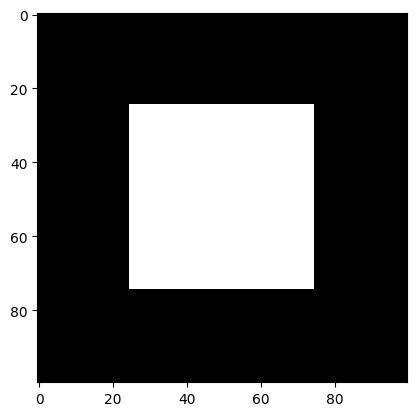

In [4]:
display(Markdown(r'### sample image'))

def print_matrix(array):
    matrix = ''
    for row in array:
        try:
            for number in row:
                matrix += f'{number}&'
        except TypeError:
            matrix += f'{row}&'
        matrix = matrix[:-1] + r'\\'
    return r'\begin{bmatrix}'+matrix+r'\end{bmatrix}'

img = np.zeros((100,100), dtype=np.uint8)
img[25:75, 25:75] = 255
plt.imshow(img, cmap='gray')
plt.show()


In [5]:

kernel2 = np.random.randint(0, 4, (3,3), dtype=np.uint8)
a = r"{}"
display(Math(f"kernel = {print_matrix(kernel2)} \quad \Rightarrow \quad kernel \\bigotimes kernel = {print_matrix(sig.convolve2d(kernel2, kernel2, mode='same'))}"))


<IPython.core.display.Math object>

## convolution association

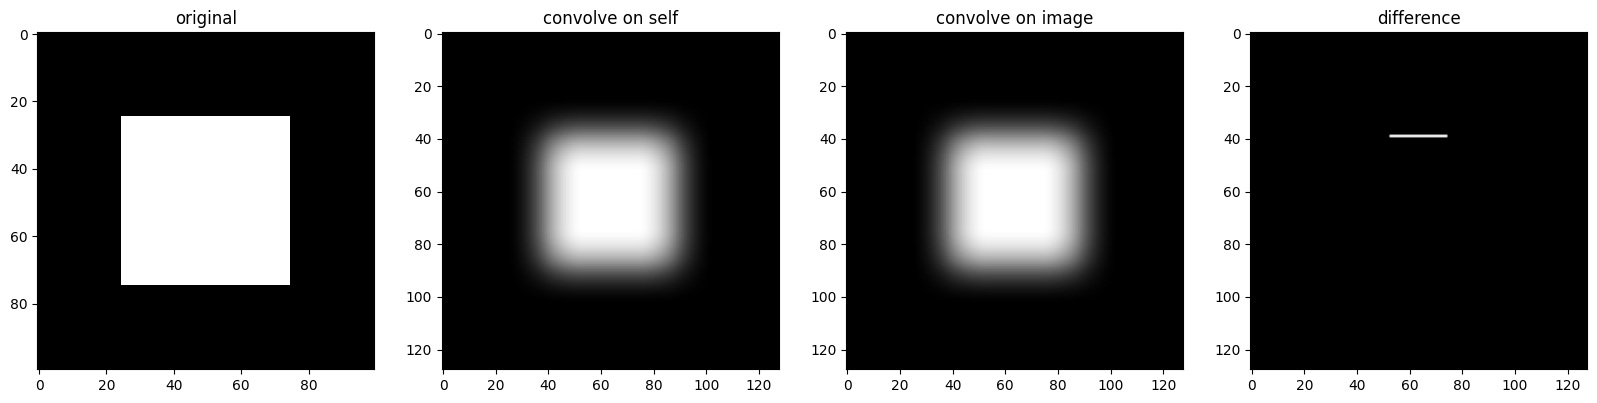

Avg. pixel error: 0.0

In [6]:
display(Markdown(r'## convolution association'))
#%matplotlib widget
def f2f(img):
    return np.clip(img, 0, 255)

def f2d(img):
    return f2f(img).astype(np.uint8)

img = img.astype(np.float64)
#B = np.random.randint(0, 2, (15,15))
B = np.ones((15,15))
#print_matrix(B)
B = B.astype(np.float64)/B.sum()

BB = (sig.convolve2d(B, B, mode='full'))
BBI = f2d(sig.convolve2d(img, BB, mode='full'))

IB = (sig.convolve2d(img, B, mode='full'))
BIB = f2d(sig.convolve2d(IB, B, mode='full'))

_, plot = plt.subplots(1, 4,figsize=(20,5))
#convulve on self
plot[0].imshow(img, cmap='gray')
plot[0].set_title('original')
plot[1].imshow(BBI, cmap='gray')
plot[1].set_title('convolve on self')
plot[2].imshow(BIB, cmap='gray')
plot[2].set_title('convolve on image')
plot[3].imshow(BIB-BBI, cmap='gray')
plot[3].set_title('difference')

plt.show()
Markdown(f"Avg. pixel error: {np.median(abs(BBI-BIB))}")

In [7]:
display(Markdown(r'## Prewit Convolution'))
prewit_filter = np.array([[-1,0,1], [-1,0,1], [-1,0,1]])
print_matrix(prewit_filter)

edge_img = np.zeros(shape=(6,6), dtype=np.uint8)
edge_img[:, :3] = 10
print_matrix(edge_img)
filtered = f2d(sig.convolve2d(edge_img, prewit_filter, 'same'))
print_matrix(filtered)

display(Math(f"{print_matrix(edge_img)} \\ast {print_matrix(prewit_filter)} = {print_matrix(filtered)}"))

## Prewit Convolution

<IPython.core.display.Math object>

In [8]:
display(Markdown(r'## Prewit Correlation'))
pfc = np.flip(prewit_filter)
display(Math(f"{print_matrix(edge_img)} \\bigotimes {print_matrix(prewit_filter)} = {print_matrix(sig.convolve2d(edge_img, pfc, 'same'))}"))

## Prewit Correlation

<IPython.core.display.Math object>

## Prewit Box filter and ones Blur associative

<IPython.core.display.Math object>

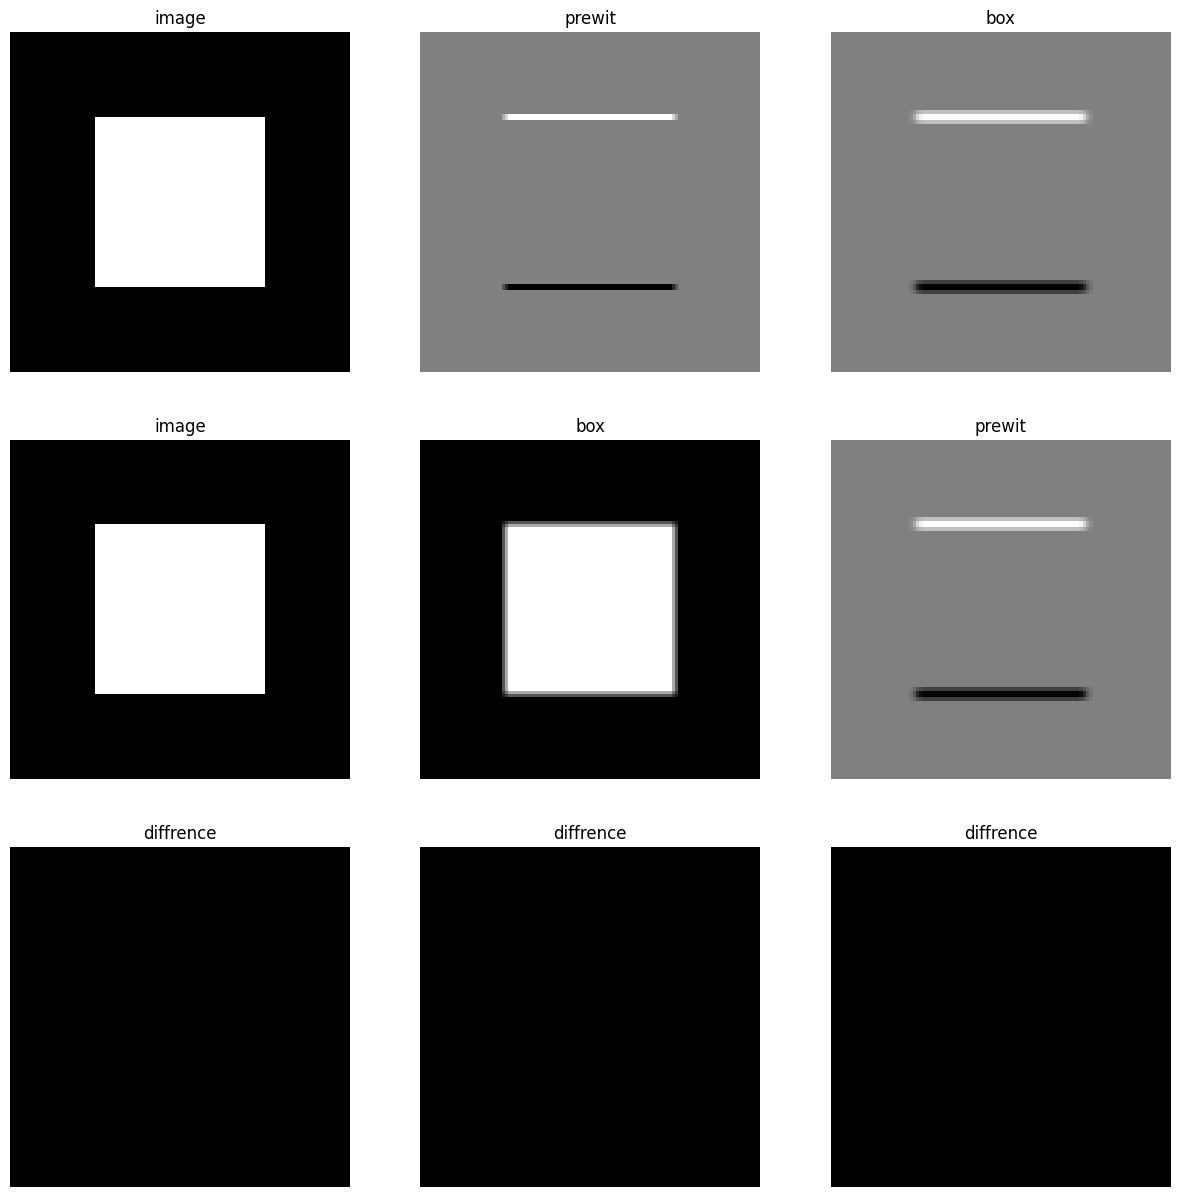

In [9]:
display(Markdown(r'## Prewit Box filter and ones Blur associative'))
P = np.array([[1,1,1], [0,0,0], [-1,-1,-1]])
box = np.ones(shape=(3,3))
display(Math(f" Prewit = {print_matrix(P)} \quad Box = {print_matrix(box)}"))
filtered = f2d(sig.convolve2d(img, P, 'same'))
_, plot = plt.subplots(3, 3, figsize=(15,15))

plot[0][0].imshow(img, cmap='gray')
plot[0][0].set_title('image')
IP = sig.convolve2d(img, P, 'same' )
plot[0][1].imshow(IP , cmap='gray')
plot[0][1].set_title('prewit')
IPB = sig.convolve2d(IP, box, 'same' )
plot[0][2].imshow(IPB , cmap='gray')
plot[0][2].set_title('box')

plot[1][0].imshow(img, cmap='gray')
plot[1][0].set_title('image')
IB = sig.convolve2d(img, box, 'same' )
plot[1][1].imshow(IB , cmap='gray')
plot[1][1].set_title('box')
IBP = sig.convolve2d(IB, P, 'same' )
plot[1][2].imshow(IBP , cmap='gray')
plot[1][2].set_title('prewit')


for i in range(3):
    plot[2][i].imshow(IPB - IBP, cmap='gray')
    plot[2][i].set_title('diffrence')
    plot[2][i].axis('off')

for i in plot.flatten():
    i.axis('off')

plt.show()

In [79]:
display(Markdown(r'## 3rd derivative mask 1-D'))

d1 = np.array([[-1,1]])
dtmp = np.array([[1]])
for i in range(3):
    dtmp = sig.convolve2d(dtmp, d1, 'full')
    display(Markdown(f"$$\\frac{{\partial^{i+1} T}}{{\partial x^{i+1}}}  = {print_matrix(dtmp)}$$"))


## 3rd derivative mask 1-D

$$\frac{\partial^1 T}{\partial x^1}  = \begin{bmatrix}-1&1\\\end{bmatrix}$$

$$\frac{\partial^2 T}{\partial x^2}  = \begin{bmatrix}1&-2&1\\\end{bmatrix}$$

$$\frac{\partial^3 T}{\partial x^3}  = \begin{bmatrix}-1&3&-3&1\\\end{bmatrix}$$

In [87]:
#Seperable filter
mat = np.array([[0,0,0,0,0], [0,1,0,2,0], [0,0,1,0,0], [0,1,0,0,0], [0,0,0,0,0]])
print_matrix(mat)
display(Math(f'img = {print_matrix(mat)}'))
mat_x = sig.convolve2d(mat, np.array([[1,1,1]]), 'same')
display(Math(f"img\_con_x = {print_matrix(mat_x)}"))
#transpose and convolve in x again and transpose back
mat_y = sig.convolve2d(mat_x.T, np.array([[1,1,1]]), 'same').T
display(Math(f"img\_con_y = {print_matrix(mat_y)}"))
display(Math(f"img\_con_{{2d}} = {print_matrix(sig.convolve2d(mat, np.ones(shape=(3,3), dtype=np.uint8), 'same'))}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>